# Understanding Descriptive Statistics

Import the necessary libraries here:

In [28]:
# Libraries
import random
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [29]:
# your code here
def roll():
    return random.randint(1,6)

values_dict = {'rolls': [roll() for i in range(10)]}
values_df = pd.DataFrame(values_dict, index=[i for i in range(1,11)])

#### 2.- Plot the results sorted by value.

<BarContainer object of 10 artists>

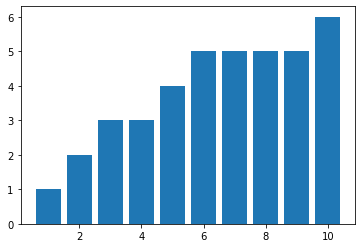

In [30]:
rolls = [i for i in range(1,11)]
values_list = list(values_df['rolls'])
values_sorted = sorted(values_list)

# I am using a barplot because even though the rolls are numeric values they represent categorical values
plt.bar(rolls,values_sorted)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<BarContainer object of 6 artists>

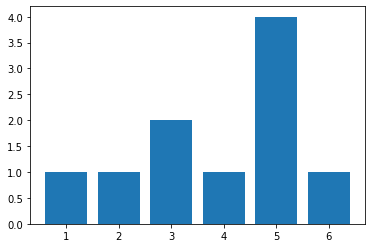

In [31]:
# your code here
freq = values_df['rolls'].value_counts()
freq_dict = {'roll': list(freq.index), 'freq': list(freq)}
freq_df = pd.DataFrame(freq_dict)

plt.bar(list(freq.index),list(freq))

In [33]:
# your comments here

print('The first plot shows the values that we got in each dice roll, while on the second plot we get the frequency of each value.')

The first plot shows the values that we got in each dice roll, while on the second plot we get the frequency of each value.


## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [34]:
# your code here
def df_mean(s):
    '''
    This function has as input a pandas series
    '''
    return s.sum()/s.count()

In [35]:
df_mean(values_df['rolls'])

3.9

In [36]:
values_df.describe()

,rolls
count,10.000000
mean,3.900000
std,1.595131
min,1.000000
25%,3.000000
50%,4.500000
75%,5.000000
max,6.000000


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [37]:
# your code here
df_mean(freq_df['freq'])

1.6666666666666667

In [38]:
# Verification
freq_df.describe()

,roll,freq
count,6.000000,6.000000
mean,3.500000,1.666667
std,1.870829,1.211060
min,1.000000,1.000000
25%,2.250000,1.000000
50%,3.500000,1.000000
75%,4.750000,1.750000
max,6.000000,4.000000


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [57]:
values_df['rolls'].

<bound method Series.get_values of 1     6
2     5
3     2
4     4
5     3
6     5
7     5
8     3
9     5
10    1
Name: rolls, dtype: int64>

In [97]:
# your code here
def df_median(s):
    '''
    This function has as input a pandas series
    '''
    s_sorted = s.sort_values()
    n = s.count()
    if n % 2 == 0:
        return (s.iloc[s_sorted.index[int(n/2)-1]-1] + s.iloc[s_sorted.index[int(n/2)]-1])/2
    elif n % 2 == 1:
        return s.iloc[s_sorted.index[int(n/2)]]

df_median(values_df['rolls'])

4.5

In [98]:
# Verification
values_df.describe()

,rolls
count,10.000000
mean,3.900000
std,1.595131
min,1.000000
25%,3.000000
50%,4.500000
75%,5.000000
max,6.000000


In [99]:
# Verification for an uneven number
df = pd.DataFrame([1,3,5,7,9])[0]
df_median(df)

5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [103]:
# your code here

In [104]:
# Verification
values_df.describe()

,rolls
count,10.000000
mean,3.900000
std,1.595131
min,1.000000
25%,3.000000
50%,4.500000
75%,5.000000
max,6.000000


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [105]:
# your code here
data = pd.read_csv('../data/roll_the_dice_hundred.csv', index_col='roll')

In [112]:
data.head(100)

,value
roll,
0,1
1,2
2,6
3,1
4,6
...,...
95,4
96,6
97,1


In [107]:
data = data.drop('Unnamed: 0', axis=1)

<BarContainer object of 100 artists>

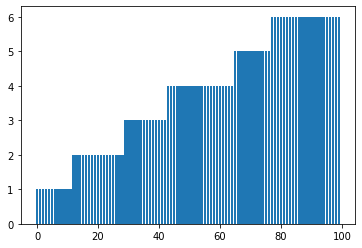

In [118]:
values_list = list(data['value'])
values_sorted = sorted(values_list)
plt.bar(data.index, values_sorted)

In [119]:
# your comments here

print("I don't have any insights by looking at this plot")

I don't have any insights by looking at this plot


#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [120]:
# your code here
df_mean(data['value'])

3.74

In [121]:
# Verification
data.describe()

,value
count,100.000000
mean,3.740000
std,1.703354
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,6.000000


#### 3.- Now, calculate the frequency distribution.


In [122]:
# your code here

freq = data['value'].value_counts()
freq_dict = {'roll': list(freq.index), 'freq': list(freq)}
freq_df = pd.DataFrame(freq_dict)

In [123]:
freq_df

,roll,freq
0,6,23
1,4,22
2,2,17
3,3,14
4,5,12
5,1,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<BarContainer object of 6 artists>

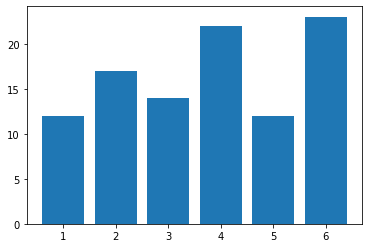

In [126]:
# your code here
plt.bar(list(freq.index),list(freq))

In [128]:
# your comments here

print("No comments")

No comments


#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [129]:
# your code here

data = pd.read_csv('../data/roll_the_dice_thousand.csv', index_col='roll')
data = data.drop('Unnamed: 0', axis=1)

In [130]:
data.head()

,value
roll,
0,5
1,6
2,1
3,6
4,5


<BarContainer object of 6 artists>

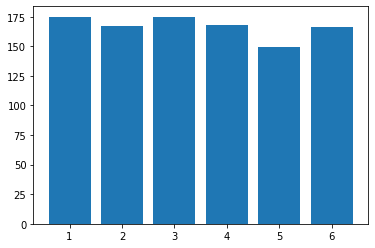

In [131]:
freq = data['value'].value_counts()
freq_dict = {'roll': list(freq.index), 'freq': list(freq)}
freq_df = pd.DataFrame(freq_dict)

plt.bar(list(freq.index),list(freq))

In [132]:
# your comments here
print('Because we now throw the dice a thousend times the frequency distribution resembles more an uniform distribution')

Because we now throw the dice a thousend times the frequency distribution resembles more an uniform distribution


## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [133]:
ages = pd.read_csv('../data/ages_population.csv')

In [134]:
ages.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120619f10>]],
      dtype=object)

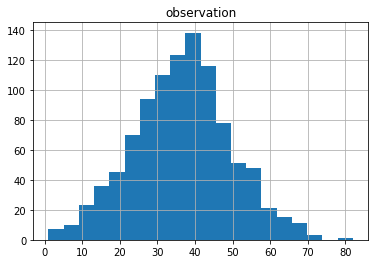

In [135]:
ages.hist(bins=20)

In [136]:
(ages.max() - ages.min())/4

observation    20.25
dtype: float64

In [137]:
print('My prediction is that the mean is between 30 and 40.')
print('The age distribution is approximated by a normal distribution so we can roughly estimate the std as (max-min)/4 = 20.25')

My prediction is that the mean is between 30 and 40.
The age distribution is approximated by a normal distribution so we can roughly estimate the std as (max-min)/4 = 20.25


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [138]:
# your code here
ages.mean()

observation    36.56
dtype: float64

In [139]:
ages.std()

observation    12.8165
dtype: float64

In [140]:
# your comments here

print('The mean predicion was correct but the std was a bit off')

The mean predicion was correct but the std was a bit off


#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [141]:
# your code here
ages2 = pd.read_csv('../data/ages_population2.csv')

In [142]:
ages2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12100d8d0>]],
      dtype=object)

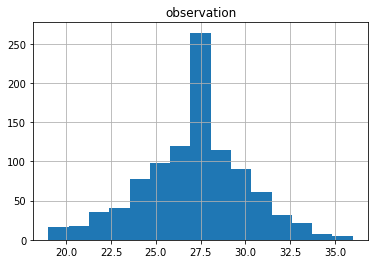

In [143]:
ages2.hist(bins=15)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [144]:
# your comments here

print('The mean is going to be around 27.5 and the std is going to be fairly low as the values are very close to the mean.')

The mean is going to be around 27.5 and the std is going to be fairly low as the values are very close to the mean.


#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [145]:
# your code here
ages2.mean()

observation    27.155
dtype: float64

In [146]:
ages2.std()

observation    2.969814
dtype: float64

In [147]:
# your comments here

print('Like it was predicted both the mean and the std are lower')

Like it was predicted both the mean and the std are lower


## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [149]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12100d7d0>]],
      dtype=object)

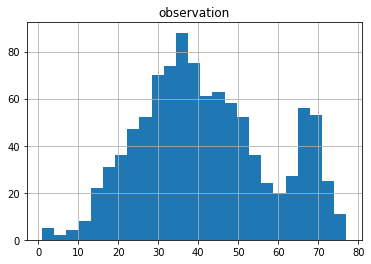

In [150]:
ages3.hist(bins=25)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [151]:
# your code here
ages3.mean()

observation    41.989
dtype: float64

In [152]:
ages3.std()

observation    16.144706
dtype: float64

In [ ]:
# your comments here

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [153]:
# your code here

In [ ]:
# your comments here


#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [154]:
# your code here

In [155]:
# your comments here


'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""